# Jupyter Notebook for Compiling The University of Alabama Thesis Chemical Structure Data

### Vincent F. Scalfani

In [5]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import PandasTools
#PandasTools.RenderImagesInAllDataFrames(images=True)

from rdkit.Chem import Draw
from rdkit import DataStructs
import numpy
import pandas as pd
import os # for changing directories

import rdkit
rdkit.__version__

'2019.09.2'

In [6]:
# Many thanks to Chris Swain's tutorial linked below, which helped me adapt the 
# the code for the thesis indexing project:
# https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html

In [7]:
# Import the thesis chemical structure data

# The file names are in the format:
# year_author_UACatalogAccession#_substances_raw.csv (e.g.,2000_Eom_KD_UA.1128100_substances_raw.csv)

# The format of the data within the file is as follows:

# SMILES_CHEMAXON_19.27.0	DATASOURCE_REGID	SUBSTANCE_SYNONYM	SUBSTANCE_COMMENT	SUBSTANCE_URL	INCHIKEY_1.05_CHEMAXON_19.27.0
# [H][C@@](Br)(CC)C(C)(C)C(O)=O	UALIB-339	Erythro-2,3-Dibromo-2-methylpentanoic acid	Eom, K.D. Total Synthesis of (+)-Asteltoxin. Ph.D. Thesis, The University of Alabama, 2000.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.1128100&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest	UCKHUOHUOYJTCV-RXMQYKEDSA-N
# [H]\C(CC)=C(/C)Br	UALIB-340	Z-2-Bromo-2-pentene	Eom, K.D. Total Synthesis of (+)-Asteltoxin. Ph.D. Thesis, The University of Alabama, 2000.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.1128100&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest	RWKAFOQZRPDXDT-PLNGDYQASA-N
# [H]\C(CC)=C(/C)C(O)=O	UALIB-341	cis-2-Methyl-2-pentenoic acid	Eom, K.D. Total Synthesis of (+)-Asteltoxin. Ph.D. Thesis, The University of Alabama, 2000.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.1128100&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest	JJYWRQLLQAKNAD-PLNGDYQASA-N
# ...

os.chdir('/home/username/UALIB_ChemStructures/StructureData/raw/CSV')

file_name_raw = '1960_Baker_GM_UA.673860_substances_raw.csv' # change this line each time, that's it. 
thesis_df = pd.read_csv(file_name_raw, sep = '\t')

# view first 10 rows
thesis_df.head(10)

,SMILES_CHEMAXON_19.27.0,DATASOURCE_REGID,SUBSTANCE_SYNONYM,SUBSTANCE_COMMENT,SUBSTANCE_URL,INCHIKEY_1.05_CHEMAXON_19.27.0
0,CC(CCCl)CS(Cl)(=O)=O,UALIB-370,4-chloro-2-methyl-1-butanesulfonyl chloride,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,XAEDGIMCOKUHPP-UHFFFAOYSA-N
1,CC1CCOS(=O)(=O)C1,UALIB-371,4-Hydroxy-2-methyl-1-butane sulfonic acid sultone,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,MKJOLUXKAUKFIT-UHFFFAOYSA-N
2,CCC(C)CS,UALIB-372,2-Methyl-1-butanethiol,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,WGQKBCSACFQGQY-UHFFFAOYSA-N
3,CCC(C)CO,UALIB-373,2-Methyl-1-butanol,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,QPRQEDXDYOZYLA-UHFFFAOYSA-N
4,CC(Cl)CC(C)CS(Cl)(=O)=O,UALIB-374,4-Chloro-2-methyl-1-pentanesulfonyl chloride,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,UDVNGPPPSPOYBZ-UHFFFAOYSA-N
5,CC1CC(C)OS(=O)(=O)C1,UALIB-375,4-Hydroxy-2-methyl-1-pentanesulfonic acid sultone,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,DPVDLSMNHIKLDR-UHFFFAOYSA-N
6,CCCC(C)CS,UALIB-376,2-Methyl-1-pentanethiol,"Baker, G.M. Proof of structure of some controv...",https://ir.ua.edu/handle/123456789/6415,ZUPLFMMTGJBSMK-UHFFFAOYSA-N


In [8]:
# Add RDKit Molecular Objects
PandasTools.AddMoleculeColumnToFrame(thesis_df,'SMILES_CHEMAXON_19.27.0','RDMol', includeFingerprints=False)
print([str(x) for x in  thesis_df.columns])

['SMILES_CHEMAXON_19.27.0', 'DATASOURCE_REGID', 'SUBSTANCE_SYNONYM', 'SUBSTANCE_COMMENT', 'SUBSTANCE_URL', 'INCHIKEY_1.05_CHEMAXON_19.27.0', 'RDMol']


,RDMol,DATASOURCE_REGID,SMILES_CHEMAXON_19.27.0,SUBSTANCE_SYNONYM,SUBSTANCE_COMMENT,SUBSTANCE_URL,INCHIKEY_1.05_CHEMAXON_19.27.0
0,,UALIB-370,CC(CCCl)CS(Cl)(=O)=O,4-chloro-2-methyl-1-butanesulfonyl chloride,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,XAEDGIMCOKUHPP-UHFFFAOYSA-N
1,,UALIB-371,CC1CCOS(=O)(=O)C1,4-Hydroxy-2-methyl-1-butane sulfonic acid sultone,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,MKJOLUXKAUKFIT-UHFFFAOYSA-N
2,,UALIB-372,CCC(C)CS,2-Methyl-1-butanethiol,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,WGQKBCSACFQGQY-UHFFFAOYSA-N
3,,UALIB-373,CCC(C)CO,2-Methyl-1-butanol,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,QPRQEDXDYOZYLA-UHFFFAOYSA-N
4,,UALIB-374,CC(Cl)CC(C)CS(Cl)(=O)=O,4-Chloro-2-methyl-1-pentanesulfonyl chloride,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,UDVNGPPPSPOYBZ-UHFFFAOYSA-N
5,,UALIB-375,CC1CC(C)OS(=O)(=O)C1,4-Hydroxy-2-methyl-1-pentanesulfonic acid sultone,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,DPVDLSMNHIKLDR-UHFFFAOYSA-N
6,,UALIB-376,CCCC(C)CS,2-Methyl-1-pentanethiol,"Baker, G.M. Proof of structure of some controversial sulfonyl chlorides. M.S. Thesis, The University of Alabama, 2000.",https://ir.ua.edu/handle/123456789/6415,ZUPLFMMTGJBSMK-UHFFFAOYSA-N

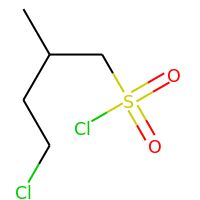
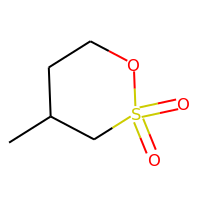
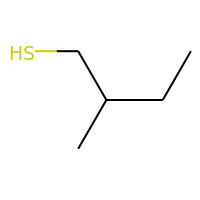
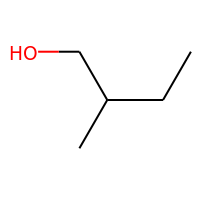
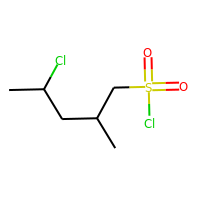
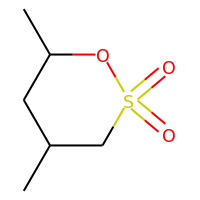
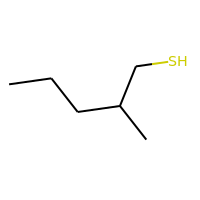

In [9]:
# rearrange table order
thesis_df = thesis_df[['RDMol',
 'DATASOURCE_REGID',
 'SMILES_CHEMAXON_19.27.0',
 'SUBSTANCE_SYNONYM',
 'SUBSTANCE_COMMENT',
 'SUBSTANCE_URL',
 'INCHIKEY_1.05_CHEMAXON_19.27.0']]

# Display table
# thesis_df
# fixes mol display in dataframes (RDKit Issue# 2673)
from IPython.display import HTML;HTML(thesis_df.head(len(thesis_df.index)).to_html()) 

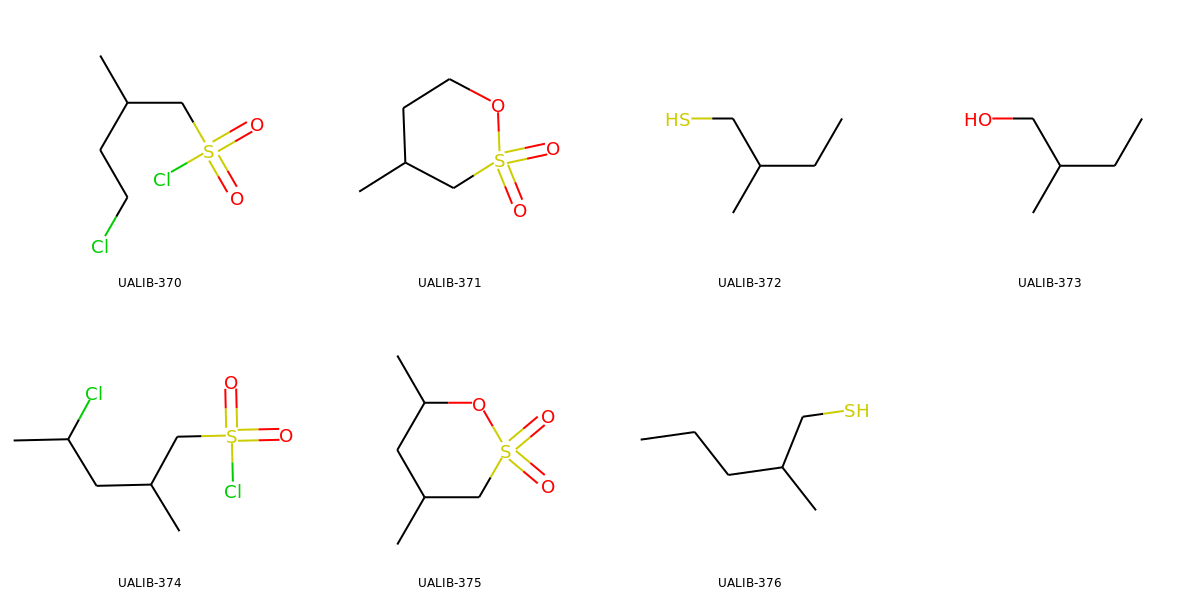

In [10]:
# we can also display just the molecules like this:
PandasTools.FrameToGridImage(thesis_df,column= 'RDMol', molsPerRow=4,subImgSize=(300,300),legendsCol="DATASOURCE_REGID")

In [11]:
# Now we need to caluclate the InChIs from RDKit and add to thesis_df
# These are InChI 1.05 as computed by RDKit 2019.09.2 release.

inchi_list = []
for mol in thesis_df['RDMol']:
    inchi = Chem.MolToInchi(mol)
    inchi_list.append(inchi)

# add to dataframe
thesis_df['INCHI_1.05_RDKIT_2019.09.2']=inchi_list

In [12]:
# Repeat for RDKit InChIKey
# These are InChI 1.05 as computed by RDKit 2019.09.2 release.
ik_list = []
for mol in thesis_df['RDMol']:
    ik = Chem.MolToInchiKey(mol)
    ik_list.append(ik)
       
# add to dataframe
thesis_df['INCHIKEY_1.05_RDKIT_2019.09.2']=ik_list

In [13]:
# Repeat for RDKit SMILES, write kekulized SMILES
# SMILES are from RDKit 2019.09.2 release.

smiles_list = []
for mol in thesis_df['RDMol']:
    Chem.Kekulize(mol)
    smiles = Chem.MolToSmiles(mol,kekuleSmiles=True)
    smiles_list.append(smiles)

# add to dataframe
thesis_df['SMILES_RDKIT_2019.09.2']=smiles_list

In [14]:
# Export the SDF for PubChem upload

# create the file name
file_name_sdf = file_name_raw.replace('raw.csv','rdkit2019092.sdf')

# cd
os.chdir('/home/username/UALIB_ChemStructures/StructureData/rdkit_processed_sdf')


PandasTools.WriteSDF(thesis_df,file_name_sdf, molColName='RDMol', 
    properties=['DATASOURCE_REGID',
                'SMILES_RDKIT_2019.09.2',
                'INCHI_1.05_RDKIT_2019.09.2',
                'SUBSTANCE_SYNONYM',
                'SUBSTANCE_COMMENT',
                'SUBSTANCE_URL'])

In [15]:
# Export to csv (tab seperated) without RDKit mol object image

# create the file name
file_name_csv = file_name_raw.replace('raw.csv','rdkit2019092.csv')

sel_cols = ['DATASOURCE_REGID',
                'SMILES_RDKIT_2019.09.2',
                'SUBSTANCE_SYNONYM',
                'SUBSTANCE_COMMENT',
                'SUBSTANCE_URL',
                'INCHI_1.05_RDKIT_2019.09.2',
                'INCHIKEY_1.05_RDKIT_2019.09.2',
                'INCHIKEY_1.05_CHEMAXON_19.27.0',
                'SMILES_CHEMAXON_19.27.0']

# cd
os.chdir('/home/username/UALIB_ChemStructures/StructureData/rdkit_processed_csv')

thesis_df.to_csv(file_name_csv, sep ='\t', index=False, columns = sel_cols)

In [16]:
# Create the SDfile for all indexed structures (run this after updating
# UALIB_Chemical_Structures_REGID.csv and submitting to PubChem)

# cd
os.chdir('/home/username/UALIB_ChemStructures')

All_df = pd.read_csv('UALIB_Chemical_Structures_REGID.csv', sep = '\t')

# view first 10 rows
All_df.head(10)

,DATASOURCE_REGID,INCHIKEY_1.05_RDKIT_2019.09.2**,SMILES_RDKIT_2019.09.2**,INCHI_1.05_RDKIT_2019.09.2**,SUBSTANCE_COMMENT,SUBSTANCE_URL,Deposited on PubChem Date,SID,CID,New to PubChem when desposited?,Date updated,updated CID,Change in SID-CID Association?,Notes
0,UALIB-1,AXUOFAQEYHGSQH-UHFFFAOYSA-L,Cl[Pd](Cl)([P](C(C)(C)C)(C(C)(C)C)CC1=CC=CC=C1...,"InChI=1S/2C15H25P.2ClH.Pd/c2*1-14(2,3)16(15(4,...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507449.0,129318068,Yes,NaN,NaN,NaN,"**UALIB-1 through UALIB-338 SMILES, InChIKey, ..."
1,UALIB-2,MVFIXGKGXUTHNF-UHFFFAOYSA-N,CC([PH+](C(C)(C)C)CC1=CC=CC=C1)(C)C.[Br-],"InChI=1S/C15H25P.BrH/c1-14(2,3)16(15(4,5)6)12-...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507450.0,129318069,Yes,NaN,NaN,NaN,NaN
2,UALIB-3,PTYMTLZROYIEAR-UHFFFAOYSA-N,[PH+](C1CCCCC1)(C2CCCCC2)CC3=CC=CC=C3.[Br-],InChI=1S/C19H29P.BrH/c1-4-10-17(11-5-1)16-20(1...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507451.0,129318070,Yes,NaN,NaN,NaN,NaN
3,UALIB-4,ACCXUCPRWSYRRY-UHFFFAOYSA-N,[PH+](C12CC3CC(C2)CC(C3)C1)(C45CC6CC(C5)CC(C6)...,InChI=1S/C27H37P.BrH/c1-2-4-19(5-3-1)18-28(26-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507452.0,11271419,No,NaN,NaN,NaN,NaN
4,UALIB-5,DYTXAAAJICVFDI-UHFFFAOYSA-N,CC(P(C(C)(C)C)CCC1=CC=CC=C1)(C)C,"InChI=1S/C16H27P/c1-15(2,3)17(16(4,5)6)13-12-1...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507453.0,5248532,No,NaN,NaN,NaN,NaN
5,UALIB-6,CDKUYUULLQLNFF-UHFFFAOYSA-N,CC1=C(C2=CC=CC=C2)C(C)=CC(C)=C1,InChI=1S/C15H16/c1-11-9-12(2)15(13(3)10-11)14-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507454.0,19876,No,NaN,NaN,NaN,NaN
6,UALIB-7,LKNANEBKEYKHMI-UHFFFAOYSA-N,CC1=C(C2=CC=CC=C2C)C(C)=CC(C)=C1,InChI=1S/C16H18/c1-11-9-13(3)16(14(4)10-11)15-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507455.0,11680084,No,NaN,NaN,NaN,NaN
7,UALIB-8,HKTCLPBBJDIBGF-UHFFFAOYSA-N,CC(C1=CC=CC=C1C2=CC=CC=C2)C,InChI=1S/C15H16/c1-12(2)14-10-6-7-11-15(14)13-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507456.0,123382,No,NaN,NaN,NaN,NaN
8,UALIB-9,RZCMFGVKVUYCQG-UHFFFAOYSA-N,CC1=CC=CC=C1C2=CC=CC=C2C(C)C,InChI=1S/C16H18/c1-12(2)14-9-6-7-11-16(14)15-1...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507457.0,21285396,No,NaN,NaN,NaN,NaN
9,UALIB-10,LDHISJKTXNVZLF-UHFFFAOYSA-N,CC1=CC=CC=C1C2=CC=CC=C2C3=CC=CC=C3,InChI=1S/C19H16/c1-15-9-5-6-12-17(15)19-14-8-7...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,2017-08-15,340507458.0,14900621,No,NaN,NaN,NaN,NaN


In [17]:
# Add RDKit Molecular Objects
PandasTools.AddMoleculeColumnToFrame(All_df,'SMILES_RDKIT_2019.09.2**','Structure', includeFingerprints=False)

# export the sdf

PandasTools.WriteSDF(All_df,'UALIB_Chemical_Structures_REGID.sdf', molColName='Structure', 
    properties=list(All_df.columns))